# Most used commands

## Print your current location in the shell

The pwd command is a shortcut for print working directory
```bash
pwd
```

## Distinguish between files and directories

We can see this with the listing (ls) command.

If we add the names of directories, this command will list their content.

# Working with directories and files

In order to move between directories we just have to use the cd command and the directory that we want to move to.

cd is a short cut for change directory.

```bash
cd destinationDirectory.

# to move to the parent directory of your current directory:
cd ..

# a single dot means the current directory
cd ./innerDirectory
cd ./innerFile.fileExtension

# The ~ means the home directory.
cd ~
```

## Copy and paste a file/directory into another location

If the file exists in the sink location it will be overwritten by the command.

The destination can be both a file or a folder

```bash
cp source.fileExtension destination
```

We can send a list of files and a destination directory in order to copy multiple files into that directory.

```bash
cp source1,csv source2.txt source3.docx destinationFolder

-- output with ls after the previous cp command:

ls destinationFolder
source1,csv source2.txt source3.docx
```

## Rename files
we can use the mv command in the current directory to achieve this.
Please keep in mind that it will overwrite existing files so if the newName that we specified already existed in the current directory it will be overwritten by the previousName file content

```bash
mv previousName.txt newName.txt
```

## Move a file/directory into another location

We can use the mv to move anything we want into another directory.

mv can also be used to rename files.

mv stands for move directory.
```bash
# It receives a list of files and a destination directory
mv file1.csv file2.txt ..

# renaming a file
mv currentName.txt newName.txt
```

<b>both cp and mv will overwrite existing files.</b>

## Deleting files

We can use the rm command which stands for remove, it can receive a list of files.

```bash
rm file1.txt dir1/file2.csv
```

## create and delete a directory

You can't use the rm command in order to delete a directory, you have to use the rmdir which stands for remove directory.

Keep in mind that the rmdir can only be executed to delete empty directories (but there are flags that could help you to delete the content of the directory and after that the directory itself).

In order to create a new directory we can use the mkdir command which stands for make directory.

```bash
# create a new directory in the current location
mkdir newDir
# remove the empty directory that we have just created
rmdir newDir
```

## The tmp folder
Is a temporal directory to store files that will be needed briefly.
It is immediately below the root directory.

# Manipulating Data

## View a file's content
The simplest way to do this is with cat, it just prints the contents of files onto the screen.
We can send a list of files and it will print all the files whose names we give it, one after the other.

## View a file's contents piece by piece
We can use it to display one page at a time for a given file, we can press space-bar to page down or type "q" to quit.
If we send this command a list of files we can type ":n" to move to the next file, ":p" to go back to the previous one, or ":q" to quit.

```bash
less seasonal/spring.csv seasonal/summer.csv
```

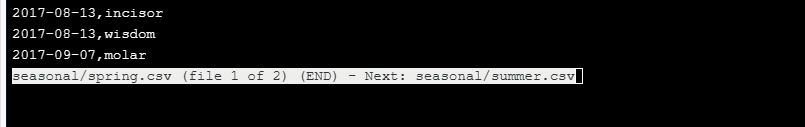

## Look at the start of a file
We can do so by using the head command which prints the first few lines of a file (10 by default). If a file contains less than 10 lines it will only print the amount available for that file.

## Look at the end of a file
We just have to use the tail command, it prints the last rows from a file.

## Select columns of a file
If you want to select columns, you can use the command cut. You can select a column range and the delimiter (to separate the columns).

```bash
cut -f 2-5,8 -d , values.csv
# Same as SELECT columns 2 to 5 and 8 from values.csv delimiting by ","
```

<b>IMPORTANT! the cut command doesn't understand queoted strings:</b>

For example, for
<table>
    <tr>
        <th>Name, Age</th>
    </tr>
    <tr>
        <td>"firstName, lastName", 28</td>
    </tr>
    <tr>
        <td>"secondName, lastName2", 28</td>
    </tr>
</table>

If we run
```bash
cut -f 2 -d , everyone.csv
```
It will return:

<ul>
<li>Age</li>
<li>lastName</li>
<li>lastName2</li>
</ul>


## Control what commands do
We can achieve this by using flags. Command flags don't have to be -letter buy it's a widely-used convention.
It's a good practice to put all flags before any filenames.

Here is an example using the -n flag (which stands for "number of lines") to manipulate the standard value for the head command.
```bash
head -n 5 seasonal/spring.csv
```

## Get help for a command
As you can imagine there are tons of flags out there for every command, which can be difficult to memorize. The good new's is that we don't have to, we can use the "man" command to get the manual for each command that we want.

For example, the next command will print everything that we can do with the head command
```bash
man head
```

## Cut lines from a file

We can use the cut command to remove lines from our files

```bash
cut -flags filesToAffect
```

## Count the records of a file
The command wc (word count) prints the number of characters, words, and lines in a file.

```bash
wc flags file
wc -l file #Count lines flag
```

## Sort lines of text
We can use the sort command and it's multiple flags to manipulate the order that we want, by default it does the ordering in ascending alphabetical order.

```bash
cut -d , -f 2 seasonal/summer.csv | grep -v Tooth | sort -r
# will select the second column from the delimited by comma (,) file, then ignore the rows that contain "Tooth" and finally sort the result in descending alphabetical order.
```

## Remove duplicate lines
In order to do so, we can use the uniq command, whose job is to remove adjacent duplicated lines.

uniq is built to work with very large files. In order to remove non-adjacent lines from a file, it would have to keep the whole file in memory (or at least, all the unique lines seen so far). By only removing adjacent duplicates, it only has to keep the most recent unique line in memory.

```bash
cut -d , -f 2 seasonal/winter.csv | grep -v Tooth | sort | uniq -c
# after sorting will count how many appearances a text has.
```

## Specify many files at once
The shell allows us to use wildcards to specify a list of files with a single expression.

Here are the wildcards that we can use:

<table>
    <tr>
        <th>wildcard</th>
        <th>description</th>
        <th>example</th>
    </tr>
    <tr>
        <td>*</td>
        <td>match zero or more characters</td>
        <td>seasonal/* will take everything inside that folder</td>
    </tr>
    <tr>
        <td>?</td>
        <td>Matches a single character</td>
        <td>201?.txt will match 2017.txt and 2018.txt, but not 2017-01.txt</td>
    </tr>
    <tr>
        <td>[...]</td>
        <td>Matches any of the characters inside the square brackets</td>
        <td>201[78].txt matches 2017.txt and 2018.txt, but not 2016.txt</td>
    </tr>
    <tr>
        <td>{...}</td>
        <td>Matches any of the comma-separated patterns inside the curly brackets</td>
        <td>{*.txt, *.csv} matches any file with .txt or .csv extension, but not files whose names end with .pdf</td>
    </tr>
    <tr>
        <td>Combining wildcards</td>
         <td>The wildcards listed above can be combined</td>
        <td>{singh.pdf, j*.txt} will work for singh.pdf johel.txt but will ignore sandhu.pdf sandhu.txt</td>
    </tr>
</table>


## Save the output of the shell into a file
By doing so, nothing will appear in the shell, but it will save the previousCommand in the file destination that we gave.

```bash
yourPreviousCommand > destination.fileExtension
```

## Get the coincidences of an input text in the shell

We can do so by using the grep command, in the next example the grep command will return all the file lines from the source file that contain the text that we specified, we can use it with multiple files.

```bash
grep lookUpWord sources...
```

## Concatenate files

We can concatenate the content of multiple files by using the cat command.

```bash
cat files/folders
```

# Create a pipeline of commands:

While working with the shell we can create a pipeline in order to execute multiple commands and use the output of one command as the input for the next one in the pipeline

```bash
yourFirstCommand | yourSecondCommand ...
```

## Access the history of the shell

We can retrieve all the commands that we have executed in the command prompt just by using the history command. We will get an ordered list (based on the order of execution) with all the commands that we have executed.

Then we can re-run a command just by the !commandId syntax. We can also use the !command syntax in order to re-run the latest command that matches the one we sent.

```bash
history

!5

!head
```

# Save commands to run later

We can store commands in files and then call them using the bash source command.

It is a standard that the files with the .sh extension contain only shell scripts

```bash
yourCommands > sink.sh;

bash sink.sh
```

When running a shell script you can also pass parameters to its execution, as shown:

```bash
bash yourFile param1, param2...
```
Inside your file it should be something like:

```bash
# $@ is your param
head $@ | grep...
```

# Uses of nano

We can use nano as a text editor in the shell. If we use nano with an nonexistent file name it will create the file

## Creating loops in the shell

We can create them using semi-colons or split them across lines without semi-colons.

NOTE: When creating a loop in multiple line it's not necessary to indent the lines inside the loop.

```bash
# You can also create comments in shell scripts
for var in yourInput
do
    head -n 2 $var | grep -v Awesome
    tail -n 1 $4 filename
done
```


## How does the shell store information?

It uses variables, some are called environment variables which are available all the time. The environment variables are conventionally written in upper case.

Here are some examples:

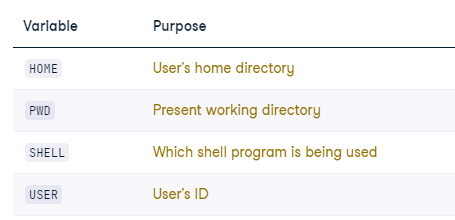

We can get the complete list with the set command.

## Print a variable's value

We can do so by using the echo command, which prints all the arguments that we type after it.

```bash
--> input:
echo hello world!

--> output: 
hello world!
```

In order to print the value of a variable we must add a sign before the variable's name:

```bash
--> input:
echo USER

--> output: 
USER

--> input:
echo $USER

--> output: 
MY_USERNAME
```

## Other way to store information in the shell
We can create our own variables while working in the shell:
variableName=value ##without any spaces before or after the = sign.


## Pass filenames to scripts

To support this, we can use the special expression $@ which means "all of the command-line parameters given to the script"

```bash
file.sh:
    sort $@ | uniq

bash file.sh myFile.csv
```
Will output the unique values that it finds in myFile.csv. The shell replaces $@ with myFile.csv. Please keep in mind that the $@ expression will be substituted by all the parameters that you send, so in the previous example if you type:

```bash
bash file.sh myFile.csv secondFile.csv
```

Will output the unique values for myFile and will do the same for the secondFile.

## How to process a single argument

While working with the shell, we could be working with pipelines that need more than one parameter, we can do this by using the $num syntax in the script to refer to specific shell parameters.

```bash
file.sh:
    cut -d , -f $2 $1

bash file.sh myFile.csv 1
```